## **Cas Kaggle** - Àngela Obón Soto (1600359) i Muniba Liaqat Ali Ali (1635042)

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

El dataset que analitzarem conté informació sobre l'activitat dels llistats d'Airbnb a la ciutat de Nova York durant el 2019. Aquest conjunt de dades inclou detalls sobre els amfitrions, la ubicació geogràfica de les propietats, preus, disponibilitat, ressenyes i més.
**L'Objectiu Principal** d'aquesta anàlisi és explorar i comprendre els factors que influeixen en els preus (`price`) i la disponibilitat de les llistes a Nova York, així com identificar patrons geogràfics i mètriques relacionades amb l'activitat dels amfitrions; i proporcionar recomanacions basades en l'anàlisi de dades.". En particular, busquem respondre les preguntes següents. 

1. Quines diferències hi ha en els preus entre les diferents àrees de la ciutat?
2. Quins factors tenen més influència en el preu dels llistats?
3. Quines àrees tenen la major disponibilitat i per què?
4. És possible identificar patrons a l'activitat dels amfitrions més ocupats?
5. Quins insights geoespacials es poden derivar de l'anàlisi de les dades?
6. Quins patrons s'observen a la distribució de preus entre diferents barris i tipus d'habitacions?
7. Quins són els barris més populars o més rendibles?
8. Quins factors tenen un impacte significatiu en la fixació de preus?

Aquesta anàlisi no només permet entendre les dinàmiques del mercat d'Airbnb a Nova York, sinó que també proporciona informació útil tant per a amfitrions que busquen optimitzar els llistats com per a usuaris interessats a trobar les millors opcions d'allotjament.

In [100]:
#imports

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor






### **1. Anàlisis d'atributs**

In [74]:
#exploracion inicial, veiem les dades del dataset
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### **Descripció de Variables Clau**

Entre totes les variables del dataset, ens centrarem en `price` com la nostra variable objectiu. Aquesta variable representa el cost per nit dels allotjaments i serà clau per analitzar patrons i construir models predictius

**price:** Preu de l'allotjament (variable objectiu en moltes anàlisis).
Rang observat: 0 a 10,000 (abans del filtratge d'outliers).

**room_type:** Tipus d'habitació (categoria: Entire home/apt, Private room, Shared room).

**neighbourhood_group:** Agrupació geogràfica dels barris (categories: Bronx, Brooklyn, Manhattan, Queens, Staten Island).

**availability_365:** dies de disponibilitat de l'allotjament durant l'any.

**number_of_reviews:** Nombre total de ressenyes rebudes per cada llistat.

**minimum_nights (Nits mínimes):** Determina les restriccions de reserva i pot influir en la disponibilitat i popularitat dels llistats.

#### **Resum inicial del dataset**

In [75]:
# Resumen extenso de las variables del dataset

def summarize_dataset(df):
    print("======================== ESTRUCTURA DEL DATASET ========================")
    print(df.info())
    
    print("\n======================== COLUMNAS EN EL DATASET ========================")
    print(df.columns.to_list())
    
    print("\n======================== TAMAÑO DEL DATASET ============================")
    print(f"Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}")
    
    print("\n======================== PRIMERAS LÍNEAS DEL DATASET ===================")
    print(df.head())
    
    print("\n======================== VALORES NULOS ================================")
    nans = (df.isna().sum().sort_values() / len(df) * 100).round(2)
    print(nans)
    
    print("\n======================== TIPO DE DATOS ================================")
    print(df.dtypes)
    
    print("\n======================== DESCRIPCIÓN GENERAL ===========================")
    print(df.describe(include='all'))
    
    
    
    
    #return variables_summary_df

# Para usar la función, simplemente llamarla con el DataFrame:
# resumen_df = summarize_dataset(df)


In [76]:
resumen_df = summarize_dataset(df)

======================== ESTRUCTURA DEL DATASET ========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews   

In [77]:

print("\n======================== RESUMEN DE VARIABLES =========================")
variables_summary = {
    "Column": df.columns,
    "Data Type": df.dtypes,
    "Null Values (%)": (df.isnull().sum() / len(df)) * 100,
    "Unique Values": df.nunique()
}

variables_summary_df = pd.DataFrame(variables_summary).reset_index(drop=True)

variables_summary_df



======================== RESUMEN DE VARIABLES =========================


,Column,Data Type,Null Values (%),Unique Values
0,id,int64,0.000000,48895
1,name,object,0.032723,47905
2,host_id,int64,0.000000,37457
3,host_name,object,0.042949,11452
4,neighbourhood_group,object,0.000000,5
5,neighbourhood,object,0.000000,221
6,latitude,float64,0.000000,19048
7,longitude,float64,0.000000,14718
8,room_type,object,0.000000,3
9,price,int64,0.000000,674


#### **Objectiu del Dataset**

**L'Objectiu Principal** d'aquesta anàlisi és explorar i comprendre els factors que influeixen en els preus i la disponibilitat de les llistes d'Airbnb a Nova York. A més, es busca identificar patrons geogràfics i mètriques relacionades amb l'activitat dels amfitrions, per tal de proporcionar recomanacions basades en l'anàlisi de dades. Entre els punts específics a abordar, destaquen:

1. Identificar els factors que més influeixen en els preus (tipus d'habitació, localització, ressenyes, etc.).
2. Analitzar patrons de disponibilitat i activitat segons zones i amfitrions.
3. Preservar la qualitat del dataset per assegurar conclusions representatives i útils.

##### **Justificació de la Neteja de Dades**

Per assolir aquests objectius, és fonamental tenir un dataset net i representatiu. Això implica tractar duplicats, valors extrems i valors nuls, assegurant que les dades reflecteixin amb precisió el mercat i evitant biaixos en els resultats.


---

##### Neteja de Dades: Duplicats, Valors Extrems i Tractament de NaNs

#### Verificació de Duplicats
- **Motiu**: Les files duplicades poden distorsionar l'anàlisi i fer que els resultats siguin menys fiables.
- **Acció**: Verifiquem duplicats en el dataset.
- **Resultat**: No detectem duplicats (`duplicates_count = 0`), la qual cosa garanteix que cada observació és única i vàlida per a l'anàlisi.

---

#### Filtrat de Valors Extrems

1. **Preus**:
   - **Motiu**: Els valors extrems poden distorsionar les mètriques i afectar els models predictius.
   - **Acció**: Eliminem registres amb:
     - `price = 0` (inconsistents amb l'objectiu d'un lloguer de pagament).
     - `price > 1000` (listats de luxe extrems que no representen el mercat general).
   - **Resultat**: Assegurem que els preus estiguin en el rang (0, 1000]
   
   Hem aplicat filtres per eliminar preus `(price)` iguals a 0 o superiors a 1,000 USD, assegurant que `price` representi el mercat general de forma precisa

2. **Nits Mínimes**:
   - **Motiu**: Valors molt alts (>30 dies) no reflecteixen lloguers a curt termini, el focus principal d'Airbnb.
   - **Acció**: Eliminem registres amb `minimum_nights > 30`.
   - **Resultat**: Preservem els llistats rellevants per a l'objectiu principal d'Airbnb.

---

#### Tractament de NaNs

1. **Motiu**:
   - Eliminar valors nuls pot reduir significativament la mida del dataset i generar biaixos, ja que molts NaNs tenen significat (e.g., llistats sense ressenyes).
   - Alguns camps com `last_review` i `reviews_per_month` són rellevants només per a llistats amb activitat. Els NaNs no són errors, sinó indicadors de manca d'activitat en aquests casos.

2. **Accions**:
   - **Valors descriptius**: Omplim els NaNs de `name` i `host_name` amb valors genèrics (`No Name`, `Unknown`) per preservar la usabilitat.
   - **Ressenyes**:
     - `last_review`: Convertim a format de data amb NaNs gestionats com `NaT`.
     - `reviews_per_month`: Omplim els NaNs amb `0`, indicant manca d'activitat de ressenyes.
   - Això assegura que les dades siguin coherents i flexibles per a l'anàlisi.

3. **Resultat**:
   - Preservem la flexibilitat del dataset per respondre preguntes específiques.
   - Mantenim la representativitat, evitant esbiaixos per l’eliminació de llistats sense ressenyes (per exemple, nous llistats o zones emergents).

---

#### Impacte de la Neteja

1. **Duplicats**: No eliminem files, ja que no hi ha duplicats.
2. **Valors Extrems**: Garantim que el dataset sigui més representatiu i coherent amb el mercat de lloguers de curt termini.
3. **NaNs**: ransformem aquests valors en significatius, preservant la informació i assegurant que el dataset sigui complet i fiable per a l’anàlisi.




In [78]:
#Identificar columnes amb valors nuls 

null_columns = df.columns[df.isnull().any()]
null_columns
print(df[null_columns].dtypes)


name                  object
host_name             object
last_review           object
reviews_per_month    float64
dtype: object


In [79]:
# Maneig inicial de valors nuls:
# - 'name' i 'host_name': omplir amb un valor genéric
df['name'] = df['name'].fillna('No Name')
df['host_name'] = df['host_name'].fillna('Unknown')
# - 'last_review': Convertir a data, nuls es mantenen com a NaT
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# - 'reviews_per_month': Omplir nuls amb 0 (llistats sense ressenyes actives)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [80]:
# Verificar duplicats
duplicates_count = df.duplicated().sum()

In [81]:
# Outliers preliminars: identificació en preus i nits minimes
# Definimos límits
df = df[(df['price'] > 0) & (df['price'] <= 1000)]  # Filtrar preuss extrems
df = df[df['minimum_nights'] <= 30]  # Filtrar nits mínimas fora de rang lógic

In [82]:
# Resum final
cleaned_shape = df.shape
# Mostrar resultats
print("\nColumnas amb valor nul:")
print(null_columns)

# Identificar columnas con valores nulos després de la limpieza
null_columns_after = df.columns[df.isnull().any()]
print("\nColumnas amb valors nuls després del tractament:")
print(null_columns_after)


print(f"\nNúmero de duplicats trobat: {duplicates_count}")

print(f"\nDimensions del dataset despres de la neteja: {cleaned_shape}")




Columnas amb valor nul:
Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

Columnas amb valors nuls després del tractament:
Index(['last_review'], dtype='object')

Número de duplicats trobat: 0

Dimensions del dataset despres de la neteja: (47924, 16)


El resultat indica que després del tractament inicial, la columna **last_review** encara conté valors nuls. Això és completament esperable per les raons següents:

En convertir **last_review** a format de data amb pd.to_datetime, els valors que originalment eren nuls s'han mantingut com a NaT (Not a Time), que és l'equivalent de "nul" per a dades de tipus datetime.
Això és lògic, ja que no hi ha informació sobre la darrera ressenya per als llistats que mai no han rebut ressenyes.

El dataset net té ara 47,924 filas i 16 columnes.

##### **Resum estadístic**

El resum estadístic és crucial perquè ens permet entendre ràpidament les característiques generals del dataset, com ara els valors promig, la dispersió, els valors extrems i la distribució de les variables. 

In [83]:
# Calcular estadísticas específicas
resumen_precio = {
    "Mitjana Preu (USD)": df['price'].mean(),
    "Mínim Precio (USD)": df['price'].min(),
    "Màxim Precio (USD)": df['price'].max()
}

resumen_minimum_nights = {
    "Media Nits Mínimes": df['minimum_nights'].mean(),
    "Màxim Nits Mínimes": df['minimum_nights'].max()
}

resumen_disponibilidad = {
    "Mitjana Disponibilitat (dies)": df['availability_365'].mean()
}

# Mostrar resultados
print("Resum de Preus:", resumen_precio)
print("Resum de Nits Mínimes:", resumen_minimum_nights)
print("Resum de Disponibilitat Anual:", resumen_disponibilidad)

Resum de Preus: {'Mitjana Preu (USD)': np.float64(141.31483181704365), 'Mínim Precio (USD)': np.int64(10), 'Màxim Precio (USD)': np.int64(1000)}
Resum de Nits Mínimes: {'Media Nits Mínimes': np.float64(5.576016192304482), 'Màxim Nits Mínimes': np.int64(30)}
Resum de Disponibilitat Anual: {'Mitjana Disponibilitat (dies)': np.float64(111.43414573074034)}


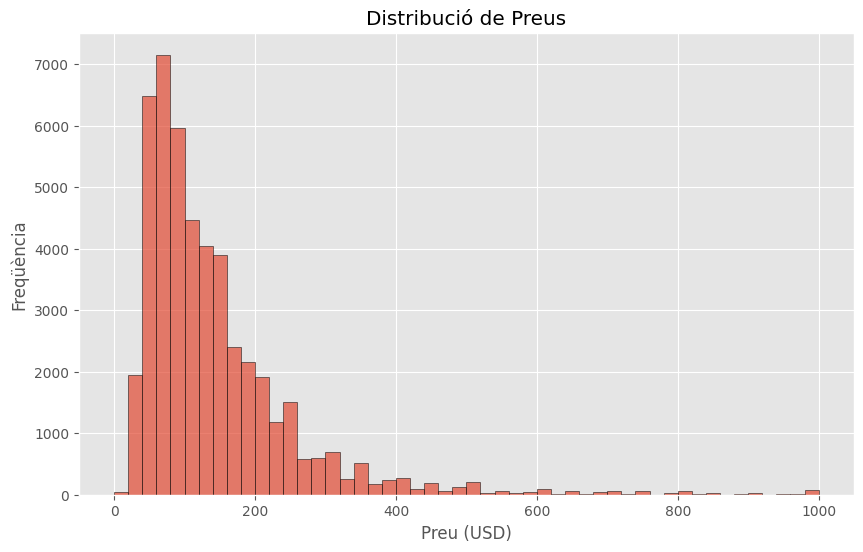

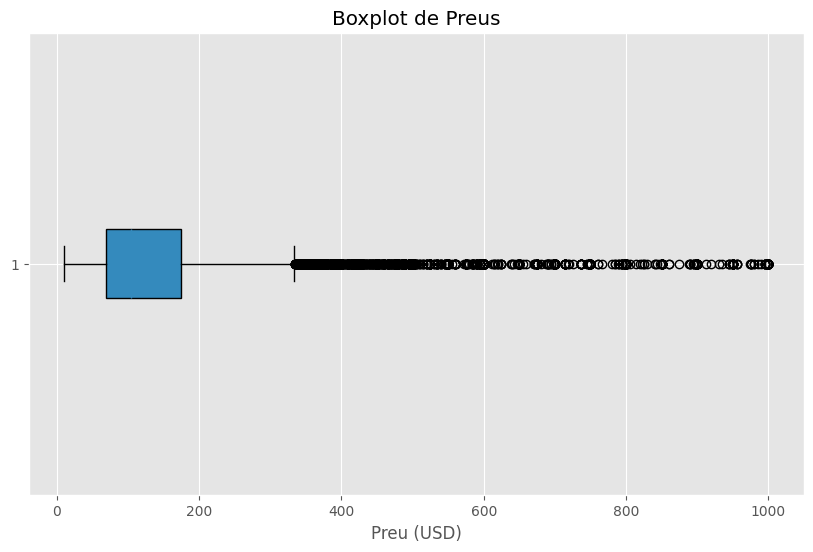

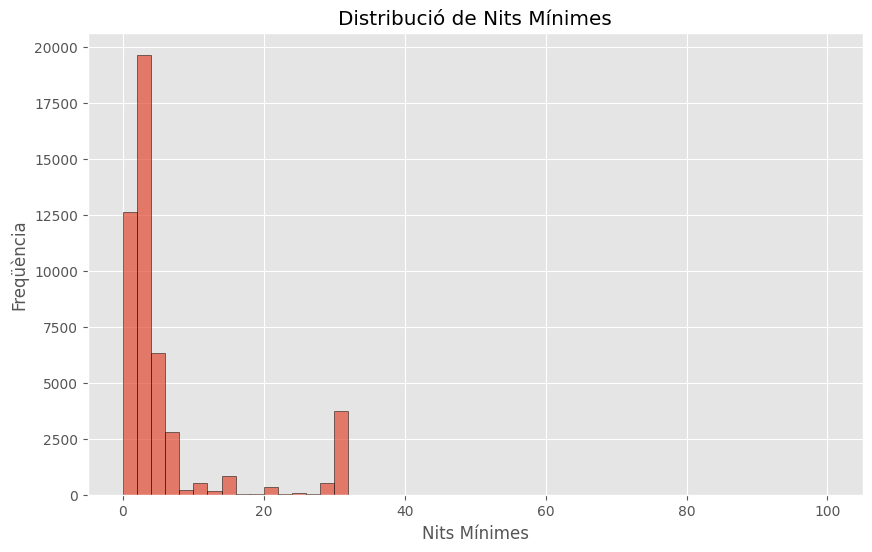

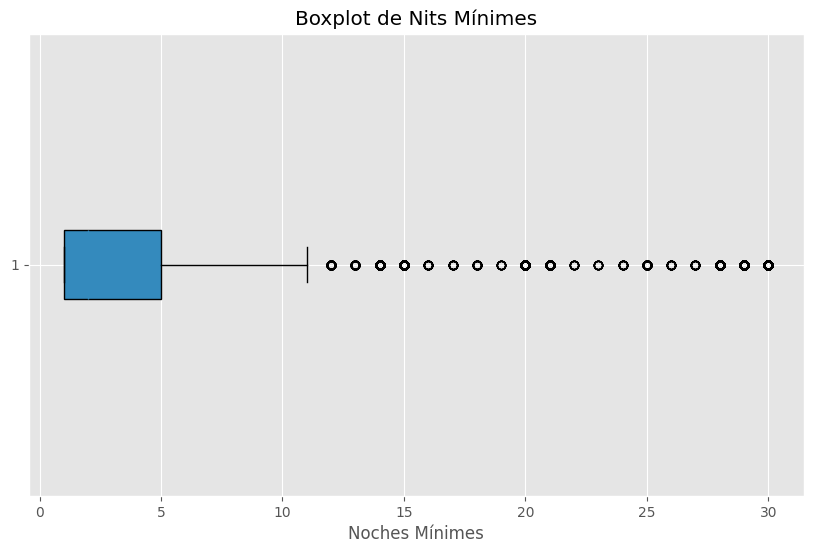

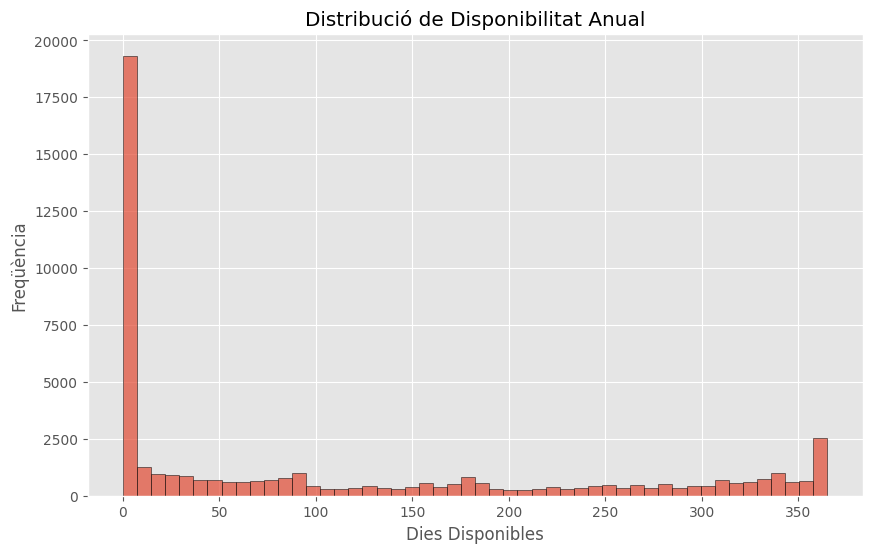

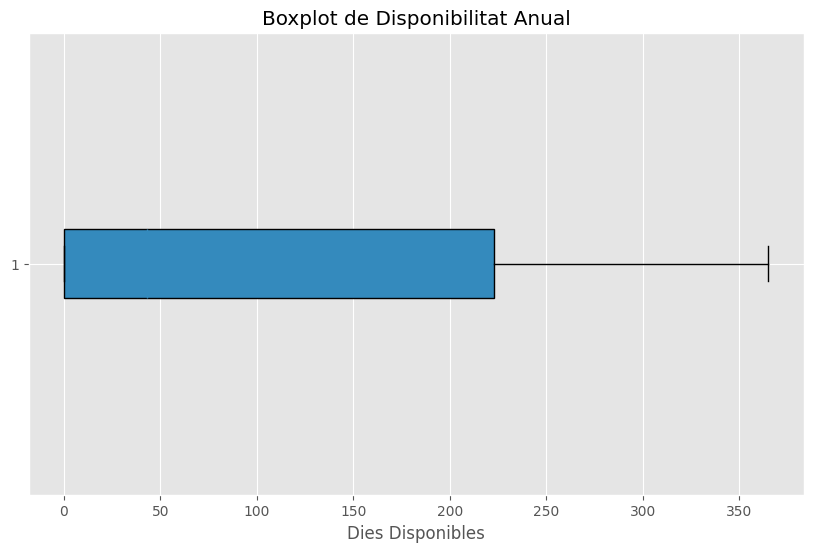

In [84]:
# Configurar estilo de los gráficos
plt.style.use('ggplot')

# Histograma de precios
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, range=(0, 1000), alpha=0.7, edgecolor='black')
plt.title('Distribució de Preus')
plt.xlabel('Preu (USD)')
plt.ylabel('Freqüència')
plt.show()

# Boxplot de precios
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, flierprops={'marker': 'o'})
plt.title('Boxplot de Preus')
plt.xlabel('Preu (USD)')
plt.show()

# Histograma de noches mínimas
plt.figure(figsize=(10, 6))
plt.hist(df['minimum_nights'], bins=50, range=(0, 100), alpha=0.7, edgecolor='black')
plt.title('Distribució de Nits Mínimes')
plt.xlabel('Nits Mínimes')
plt.ylabel('Freqüència')
plt.show()

# Boxplot de noches mínimas
plt.figure(figsize=(10, 6))
plt.boxplot(df['minimum_nights'], vert=False, patch_artist=True, flierprops={'marker': 'o'})
plt.title('Boxplot de Nits Mínimes')
plt.xlabel('Noches Mínimes')
plt.show()

# Histograma de disponibilidad anual
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=50, range=(0, 365), alpha=0.7, edgecolor='black')
plt.title('Distribució de Disponibilitat Anual')
plt.xlabel('Dies Disponibles')
plt.ylabel('Freqüència')
plt.show()

# Boxplot de disponibilidad anual
plt.figure(figsize=(10, 6))
plt.boxplot(df['availability_365'], vert=False, patch_artist=True, flierprops={'marker': 'o'})
plt.title('Boxplot de Disponibilitat Anual')
plt.xlabel('Dies Disponibles')
plt.show()

Hem seleccionat aquestes tres variables (price, minimum_nights, availability_365) perquè són crucials per a l'anàlisi d'Airbnb:

- **price (Preu):** És una de les mètriques més rellevants en qualsevol anàlisi de mercat. Comprendre'n la distribució és clau per explorar diferències entre àrees i factors que influeixen en els preus.
- **minimum_nights (Nits mínimes):** Determina les restriccions de reserva i pot influir en la disponibilitat i popularitat dels llistats.
- **availability_365 (Disponibilitat anual):** reflecteix la freqüència amb què un amfitrió posa el seu espai a disposició, cosa crucial per estudiar patrons d'ocupació.

**Interpretació de les gràfiques:**

- **Distribució de Preus (Histograma i Boxplot):**
    - La majoria dels preus es concentren entre 50 i 200 USD, amb menys freqüència en preus més alts. Els preus superiors als 1.000 USD són casos molt rars i probablement corresponen a allotjaments de luxe o valors atípics.
    - El boxplot mostra que hi ha molts valors atípics per sobre dels 400 USD, destacant una gran dispersió en els preus.

- **Distribució de Nits Mínimes (Histograma i Boxplot):**
    - La majoria dels allotjaments requereixen entre 1 i 3 nits mínimes, indicant una gran flexibilitat.
    - Alguns casos presenten requeriments de 40 o més nits, probablement enfocats a lloguers a llarg termini.
    - El boxplot confirma una alta concentració al voltant d'una nit, amb valors atípics superiors a 10 nits.

- **Distribució de Disponibilitat Anual (Histograma i Boxplot):**
    - Un gran nombre de propietats tenen 0 dies de disponibilitat, probablement llistats inactius.
    - Molts altres tenen 365 dies de disponibilitat, indicant una activitat constant.
    - La dispersió al boxplot mostra que la disponibilitat varia molt, des d'inactius fins a llistats sempre disponibles.

**Relació entre atributs: (matriu de correlacions)**

Després de realitzar una neteja al nostre dataset, veurem la relació que hi ha entre els seus atributs. 

Definició de cada atribut:
- **id:** Número únic que identifica cada allotjament del dataset.
- **name:** Nom assignat a l'allotjament, descrit com a text.
- **host_id:** Número que identifica de manera única l'amfitrió o amfitriona de cada allotjament.
- **host_name:** Nom de l'amfitrió o amfitriona que publica l'allotjament.
- **neighbourhood_group:** Districte o zona de Nova York al qual pertany l'allotjament (ex.: Manhattan, Brooklyn).
- **neighbourhood:** Barri específic dins del districte on es troba l'allotjament.
- **latitude:** Coordenada de latitud que indica la ubicació exacta de l'allotjament.
- **longitude:** Coordenada de longitud que completa la ubicació geogràfica de l'allotjament.
- **room_type:** Tipus d'espai ofert a l'allotjament (habitatge complet, habitació privada, habitació compartida).
- **minimum_nights:** Mínim de nits que cal reservar per poder allotjar-se en l'espai.
- **number_of_reviews:** Total de valoracions o ressenyes que ha rebut l'allotjament.
- **last_review:** Data en què es va deixar l'última valoració de l'allotjament.
- **reviews_per_month:** Promig de valoracions que rep l'allotjament cada mes.
- **calculated_host_listings_count:** Nombre total d'allotjaments gestionats per un mateix amfitrió o amfitriona.
- **availability_365:** Nombre de dies a l'any que l'allotjament està disponible per ser reservat.
- **price:** Cost per nit per allotjar-se a l'espai ofert.

Crec que les columnes `id`, `name`, `host_id` i `host_name` no són rellevants per a la tasca de predicció, per tant, he decidit eliminar-les.  A més, la columna `last_review` no es tindrà en compte perquè codificar totes les dates resultaria complicat i poc pràctic.

També considerem descartar la variable `neighbourhood`, ja que conté un total de 218 categories (una per a cada barri). Aquesta elevada granularitat dificulta la identificació de la zona de la ciutat a la qual pertany cada valor i complica el processament, especialment en la seva codificació. En aquest cas, treballar amb la variable `neighbourhood_group`, que resumeix els districtes principals, serà més eficient i informatiu.

Pel que fa a les columnes amb valors nuls, només afecten `last_review` i `reviews_per_month`.

In [85]:
# Treiem les vairables que no necessitem
df.drop("id", axis='columns', inplace=True)
df.drop("name", axis='columns', inplace=True)
df.drop("host_id", axis='columns', inplace=True)
df.drop("host_name", axis='columns', inplace=True)
#df.drop("latitude", axis='columns', inplace=True)
#df.drop("longitude", axis='columns', inplace=True)
df.drop("last_review", axis='columns', inplace=True)
df.drop("neighbourhood", axis='columns', inplace=True)


Per poder mostrar la matriu de correlació necessitem codificar els atributs de tipus object, que son: 
- neighbourhood_group
- room_type

In [86]:
valors = df['room_type'].nunique()

print(f"Nombre de valors codificats: {valors}")

Nombre de valors codificats: 3


In [87]:
valors = df['neighbourhood_group'].nunique()

print(f"Nombre de valors codificats: {valors}")

Nombre de valors codificats: 5


In [88]:
label_encoder = LabelEncoder()
df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])

# Encode 'room_type' with binary values (0 and 1, assuming 2 unique values)
#df['room_type'] = (df['room_type'] == 'Private room').astype(int)

df['room_type'] = label_encoder.fit_transform(df['room_type'])


# Display the first few rows of the updated dataset
df[['neighbourhood_group', 'room_type']].head()

,neighbourhood_group,room_type
0,1,1
1,2,0
2,2,1
3,1,0
4,2,0


Un cop descartats els atributs innecessaris i eliminades les files amb nans, el dataset presenta unes dimensions de 47924 files i 8 columnes.

In [89]:
print(df.shape)

(47924, 10)


price                             1.000000
calculated_host_listings_count    0.129981
availability_365                  0.117174
neighbourhood_group               0.071284
latitude                          0.062890
minimum_nights                    0.044688
reviews_per_month                -0.056564
number_of_reviews                -0.058403
longitude                        -0.259099
room_type                        -0.462708
Name: price, dtype: float64


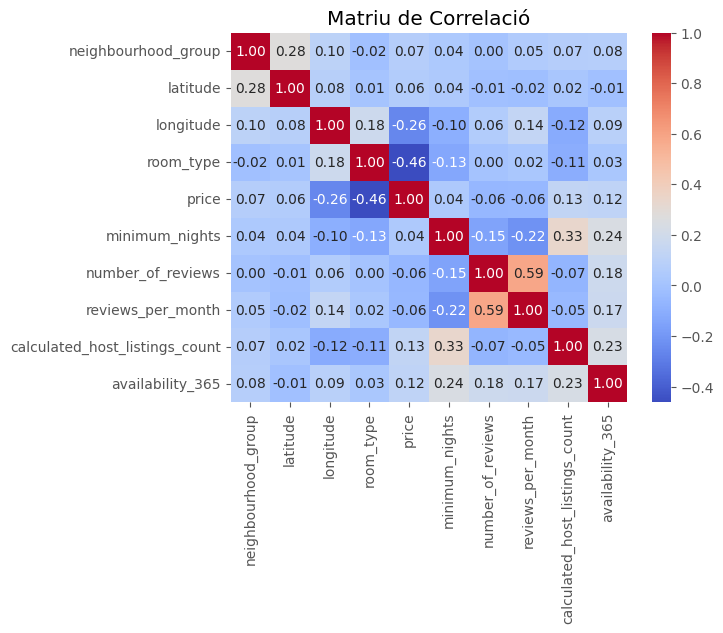

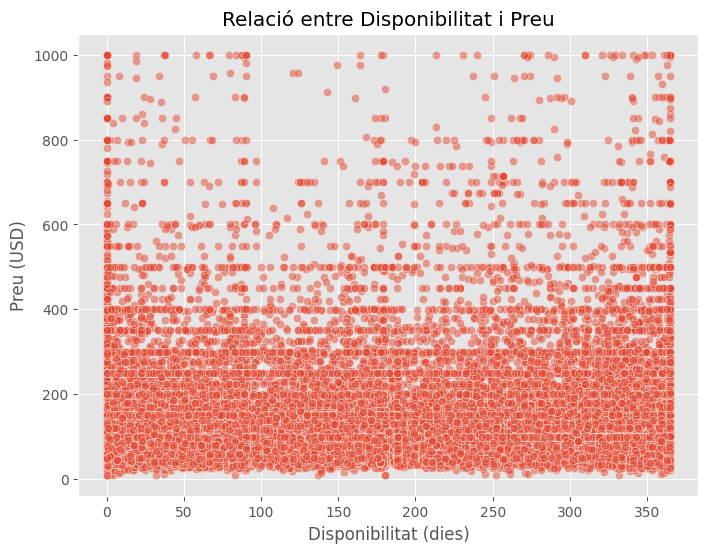

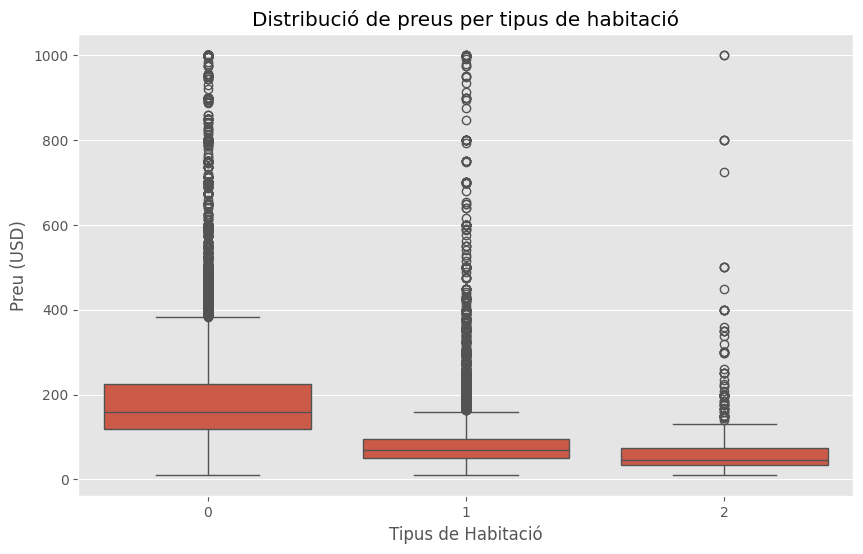

In [90]:
#ara construim la matriu de correlació 
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriu de Correlació')
plt.show()

# Gràfic de dispersió (price vs availability_365)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.5)
plt.title('Relació entre Disponibilitat i Preu')
plt.xlabel('Disponibilitat (dies)')
plt.ylabel('Preu (USD)')
plt.show()

# Boxplot: precio vs. tipo de habitación
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Distribució de preus per tipus de habitació')
plt.xlabel('Tipus de Habitació')
plt.ylabel('Preu (USD)')
plt.show()

**Per què a la matriu de correlació escollim aquestes columnes?**

Hem escollit aquestes columnes perquè són variables numèriques o codificades numèricament, cosa que permet calcular correlacions. A més, aquestes columnes tenen significat rellevant per al context:

- Variables com price, availability_365 i room_type són claus per analitzar patrons de preus i reserves.
- neighbourhood_group proporciona informació geogràfica que pot estar relacionada amb altres variables (com el preu o disponibilitat).
- number_of_reviews i reviews_per_month reflecteixen la popularitat o rendiment d'un anunci.
- minimum_nights i calculated_host_listings_count són indicadors operatius que poden influir en el comportament del mercat.
Seleccionar aquestes variables ens ajuda a identificar relacions significatives i interpretar millor els factors que afecten els preus i la disponibilitat.

**Observacions clau de la matriu de correlacions:**
- **room_type i price (-0.45):** Hi ha una correlació negativa moderada. Les habitacions privades tendeixen a tenir preus més baixos que els apartaments complets.
- **price i availability_365 (0.12):** Correlació dèbil, però lleugerament positiva. Els anuncis disponibles més dies no semblen variar massa el preu.
- **minimum_nights i calculated_host_listings_count (0.33):** Amfitrions amb més anuncis solen tenir requeriments mínims de nits més alts.

**Observacions clau de la matriu de correlacions segons el target `price`:**

En la matriu de correlació, el preu (**`price`**) mostra una relació més forta amb **`room_type` (-0.46)**, indicant que el tipus d'habitació és el factor més rellevant: les habitacions privades tendeixen a ser més barates que els apartaments complets. Hi ha correlacions febles però positives amb **`calculated_host_listings_count` (0.13)** i **`availability_365` (0.12)**, suggerint que els amfitrions amb més anuncis i major disponibilitat poden establir preus lleugerament més alts. Altres variables, com **`number_of_reviews`** i **`reviews_per_month`**, tenen correlacions negatives febles, mostrant que els anuncis més econòmics solen tenir més interacció dels usuaris. Aquestes relacions ajuden a identificar els factors més rellevants per modelitzar el preu.

**Explicació del gràfic de dispersió (relació entre disponibilitat i preu)**

Aquest gràfic analitza la relació entre disponibilitat (en dies) i preu de l'allotjament:

- Eix X: Nombre de dies de disponibilitat (0 a 365).
- Eix Y: Preu de l'allotjament (en dòlars).

**Tendència general:** Els punts estan distribuïts sense una clara relació entre preu i disponibilitat. Hi ha una gran densitat d'allotjaments amb disponibilitat al màxim (365 dies) a preus baixos o moderats.

**Observacions:**
Hi ha molts punts concentrats al voltant de preus baixos (menys de 200 dòlars), independentment de la disponibilitat.

Alguns preus extrems (per sobre de 800 USD) no mostren una relació consistent amb la disponibilitat.

**Explicació del boxplot de la distribució de preus segons el tipus d'habitació**

Aquest gràfic mostra la distribució dels preus segons el tipus d'habitació: habitatge complet (0), habitació privada (1) i habitació compartida (2). Els habitatges complets són els més cars, amb una mediana al voltant de 200 USD i molts valors extrems per sobre dels 400 USD. Les habitacions privades tenen preus més baixos, amb una mediana propera als 100 USD, mentre que les compartides són les més econòmiques, amb una mediana inferior als 100 USD i menys valors extrems. 

En conclusió, el tipus d'habitació té un impacte clar en els preus dels allotjaments. Els habitatges complets són significativament més cars, mentre que les habitacions privades i compartides ofereixen opcions més assequibles. Aquest patró és consistent amb les expectatives del mercat.

**Exemples adicionals**

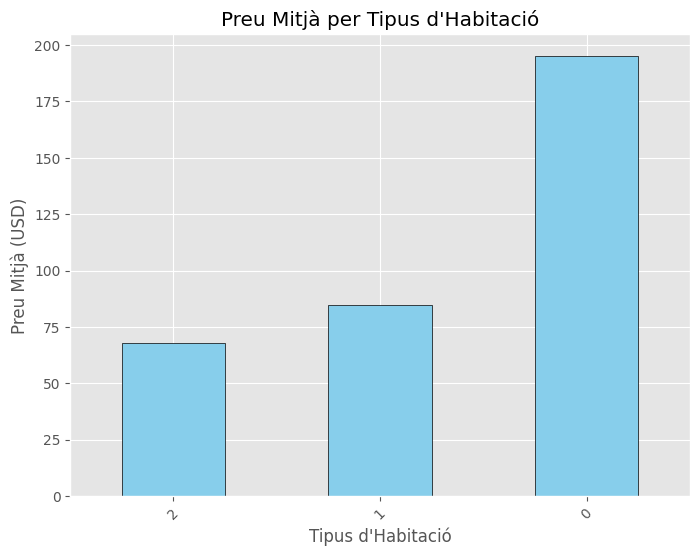

room_type
2     67.939421
1     84.818441
0    195.097428
Name: price, dtype: float64


In [91]:
# Càlcul del preu mitjà per tipus d'habitació
mean_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values()

# Visualització del preu mitjà per tipus d'habitació
plt.figure(figsize=(8, 6))
mean_price_by_room_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Preu Mitjà per Tipus d\'Habitació')
plt.xlabel('Tipus d\'Habitació')
plt.ylabel('Preu Mitjà (USD)')
plt.xticks(rotation=45)
plt.show()

# Mostrem el resultat al terminal també
print(mean_price_by_room_type)


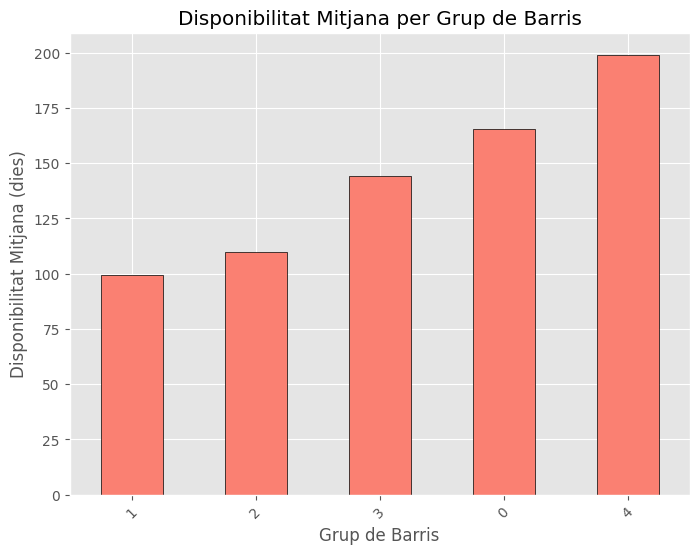

neighbourhood_group
1     99.372196
2    109.810493
3    144.041399
0    165.433086
4    199.098093
Name: availability_365, dtype: float64


In [92]:
# Càlcul de la disponibilitat mitjana per grup de barris
mean_availability_by_neighbourhood_group = df.groupby('neighbourhood_group')['availability_365'].mean().sort_values()

# Visualització de la disponibilitat mitjana per grup de barris
plt.figure(figsize=(8, 6))
mean_availability_by_neighbourhood_group.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Disponibilitat Mitjana per Grup de Barris')
plt.xlabel('Grup de Barris')
plt.ylabel('Disponibilitat Mitjana (dies)')
plt.xticks(rotation=45)
plt.show()

# Mostrem el resultat al terminal també
print(mean_availability_by_neighbourhood_group)


**Per què fem aquest apartat després de la matriu de correlació?**

Després d'analitzar la correlació entre variables numèriques amb la matriu de correlació, aquest apartat ens permet aprofundir en les relacions entre variables categòriques (room_type i neighbourhood_group) i numèriques (price i availability_365). La raó principal és que les variables categòriques no poden ser directament analitzades en una matriu de correlació. Per tant:

- room_type i price: Analitzem com el tipus d'habitació influeix en el preu mitjà. Això és essencial per entendre la segmentació del mercat i el comportament dels usuaris.
- neighbourhood_group i availability_365: Ens permet veure com varia la disponibilitat dels llistats segons les diferents zones de la ciutat, el que ens dóna informació geogràfica útil.
Aquest apartat complementa la matriu de correlació i ens ajuda a identificar patrons específics que serien difícils de veure només amb correlacions numèriques.

**Anàlisi i explicació dels resultats**

**1. Relació entre room_type i price:**

    Gràfica: Mostra el preu mitjà per tipus d'habitació:

- "Entire home/apt" (Habitatge complet): Té el preu mitjà més alt (aproximadament 200 USD), el que és esperat ja que ofereix més privacitat i espai.
- "Private room" (Habitació privada): Preu mitjà al voltant dels 100 USD, reflectint l'equilibri entre privacitat i cost.
- "Shared room" (Habitació compartida): El preu mitjà més baix (aproximadament 50 USD), sent una opció econòmica.

    Conclusions:

    Els preus estan clarament diferenciats pel tipus d'habitació.
    Aquesta informació pot ajudar els propietaris a establir preus competitius segons el tipus d'habitació i també els usuaris a triar segons el pressupost.


**2. Relació entre neighbourhood_group i availability_365:**
- Staten Island (4): Té la disponibilitat mitjana més alta (prop de 200 dies), probablement per menor competència i enfocament en lloguers a llarg termini.
- Queens (3): Mostra una disponibilitat elevada, sent popular per a lloguers continus amb una barreja d'ofertes turístiques i residencials.
- Manhattan (2): Té una disponibilitat menor que Queens, possiblement degut a una alta demanda i rotació constant de lloguers.
- Brooklyn (1): Disponibilitat moderada, reflectint la diversitat entre zones residencials i turístiques.
- Bronx (0): Disponibilitat més baixa, possiblement per menys interès turístic i més ús personal dels llistats.

Conclusió: Zones com Staten Island i Queens tenen alta disponibilitat, mentre que Manhattan i Brooklyn tenen menor disponibilitat però probablement una major demanda. Aquesta informació pot orientar estratègies de preus i llistats segons la zona.

### **2. Comparativa de Mètodes**

El nostre objectiu és construir models que puguin predir amb precisió el preu (price) en funció de variables com el tipus d'habitació, la disponibilitat i les ressenyes. En aquest apartat, seleccionarem mètodes analítics per identificar els factors que influeixen en els preus, a més també analitzarem com la ubicació influeix en la disponibilitat, i estudiarem els patrons dels anfritions, estudiant l'activitat dels amfitrions més ocupats. 

Els atributs que cal incloure han de ser rellevants per al target (price). Seleccionem variables numèriques i categòriques significatives. 

- latitude, longitude: Indicadors geogràfics importants.
- minimum_nights, availability_365: Factors que afecten els preus d'Airbnb.
- reviews_per_month, number_of_reviews: Indicadors de popularitat i activitat.
- neighbourhood_group, room_type: Variables categòriques que poden influir en els preus.

Amb els atributs seleccionats, i el dataset net, farem la separació en X i Y, on X seràn les variables independents i Y la variable depenent.


In [93]:
# Exportar el DataFrame limpio a un archivo .csv
#df.to_csv('AB_NYC_2019_limpio.csv', index=False)


In [101]:
target = "price"
atrributes =  [k for k in df.keys() if k!=target]

X = df[atrributes].to_numpy()
y = df[target].to_numpy()

print("Atributs (X):", atrributes)
print("Target (y):", target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

total_samples = len(df)
train_size = len(X_train)
test_size = len(X_test)

print(f"Total samples: {total_samples}")
print(f"Train size: {train_size} ({train_size / total_samples:.2%})")
print(f"Test size: {test_size} ({test_size / total_samples:.2%})")




Atributs (X): ['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Target (y): price
X_train shape: (38339, 9)
X_test shape: (9585, 9)
y_train shape: (38339,)
y_test shape: (9585,)
Total samples: 47924
Train size: 38339 (80.00%)
Test size: 9585 (20.00%)


In [95]:
# Estandarditzar les dades numèriques
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Standardize features using a pipeline for each model
#scaler = StandardScaler()

Per complir els objectius específics de l'anàlisi, és crucial triar mètodes que permetin abordar tant la precisió en la predicció de preus com la identificació de patrons en la disponibilitat i l'activitat dels amfitrions

- **Regressió lineal:** Tot i ser un model simple, és ideal com a model base per analitzar com les variables influencien el preu. La seva simplicitat i interpretabilitat la fan una elecció clau per establir un punt de referència i per entendre les relacions lineals entre les variables predictives i el preu.
- **Random Forest**: Captura relacions no lineals entre variables, com ara les influències combinades de la ubicació (latitude, longitude) i la disponibilitat (availability_365). És robust davant de dades amb soroll, cosa que és útil si les variables tenen valors extrems o faltants prèviament tractats. Permet calcular la importància de les característiques, cosa que ajuda a identificar factors que influeixen més en els preus.
- **Gradient Boosting**: Optimitza l'error de predicció en passos successius, fent servir relacions complexes entre variables. Ofereix més precisió que Random Forest per a datasets estructurats i ben preparats com aquest. Ajuda a identificar patrons subtils, com ara l'impacte de variables categòriques (room_type, neighbourhood_group) en el preu.
- **Decision Tree**: És fàcil d'interpretar i permet visualitzar com les variables influeixen en el preu. Útil per estudiar patrons a la disponibilitat ia l'activitat dels amfitrions més ocupats. És una bona base per explicar resultats a partir de divisions lògiques del dataset.
- **KNN**: Es útil para identificar patrones locales, como diferencias de precio según la ubicación. Permite explorar cómo la cercanía geográfica influye en la disponibilidad o los precios. Puede ser menos interpretativo, pero es una opción interesante si los datos tienen fuertes agrupamientos geoespaciales.

Aquests mètodes permeten abordar tant patrons lineals com no lineals, a més de proporcionar una barreja de models interpretables i més complexos. Amb aquesta combinació, s’espera obtenir una visó clara dels factors que determinen els preus i dels patrons en la disponibilitat i l’activitat dels amfitrions.

In [102]:
# Function to calculate additional metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

**Regressió Lineal**

Millors hiperparàmetres: {'fit_intercept': True}
Mean Squared Error: 9568.773595303608
R^2 Score: 0.29137009846097717


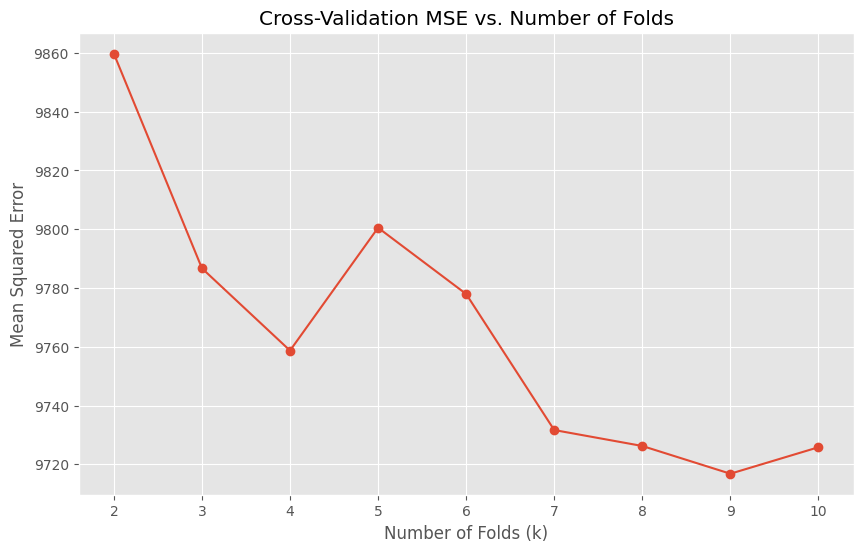

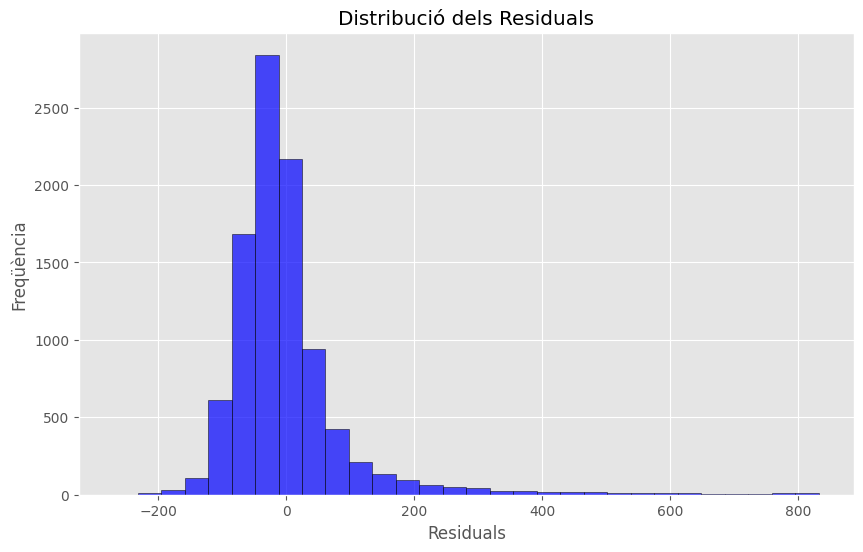

In [97]:
linear_model = LinearRegression()

# Definim els hiperparàmetres que volem explorar amb GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}

grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Entrenament del model utilitzant GridSearchCV
grid_search.fit(X_train, y_train)

# Resultats de la millor combinació d'hiperparàmetres
best_model = grid_search.best_estimator_
print("Millors hiperparàmetres:", grid_search.best_params_)

# Avaluació del model amb el conjunt de prova
y_pred = best_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Validació creuada per obtenir una mètrica més robusta
#cv_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=5)
#print("Cross-validated MSE:", -cv_scores.mean())


# Validació creuada per obtenir una mètrica més robusta
cv_scores = []
k_values = range(2, 11)
for k in k_values:
    scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=k)
    cv_scores.append(-scores.mean())

# Visualització dels resultats de cross-validation
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation MSE vs. Number of Folds')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Generem la matriu de confusió
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribució dels Residuals')
plt.xlabel('Residuals')
plt.ylabel('Freqüència')    
plt.grid(True)
plt.show()


**Resum dels Resultats de la Regressió Lineal**

1. **Cross-Validation MSE vs. Number of Folds**
- Aquest gràfic mostra com varia l'error mitjà quadràtic (MSE) quan utilitzem diferents valors de `k` (número de particions en validació creuada).
- **Observació clau:** El MSE disminueix a mesura que `k` augmenta fins a estabilitzar-se al voltant de `k=9`. Això indica que 9 folds proporcionen una estimació equilibrada del rendiment del model.
- El valor mínim del MSE és d'aproximadament **9.720**, indicant que l'error de predicció encara és significatiu.

2. **Distribució dels Residuals**
- Els residuals representen la diferència entre els preus predits i els preus reals (`y_test - y_pred`).
- La majoria dels residuals estan propers a zero, la qual cosa indica que el model prediu correctament molts dels valors del preu.
- **Observacions addicionals:**
  - Hi ha residuals dispersos tant cap a valors positius com negatius. 
    - Residuals positius indiquen que el model ha subestimat el preu.
    - Residuals negatius indiquen una sobreestimació.
  - Existeixen residuals extrems (valors lluny de zero), suggerint que hi ha alguns punts de dades amb comportaments que el model no ha capturat correctament.

3. **Mètriques de Rendiment**
- **Mean Squared Error (MSE):** El valor de **9.568.77** representa l'error quadràtic mitjà de les prediccions. Aquest valor és elevat, suggerint que hi ha un marge significatiu per millorar la precisió del model.
- **R² Score:** Amb un valor de **0.291**, el model només és capaç d'explicar el 29% de la variabilitat en el preu (`price`). Això implica que la regressió lineal no és suficient per capturar tota la complexitat del dataset i que hi ha altres factors importants o relacions no lineals que el model no pot representar.

4. **Millors Hiperparàmetres**
- El millor hiperparàmetre trobat és `fit_intercept=True`, el qual permet al model ajustar una constant al seu càlcul per representar millor les dades.


**Random Forest**

c:\Users\aobon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Millors hiperparàmetres: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Mean Squared Error: 8125.565679498164
R^2 Score: 0.37746130248207
Cross-validated MSE: 8600.969983866773


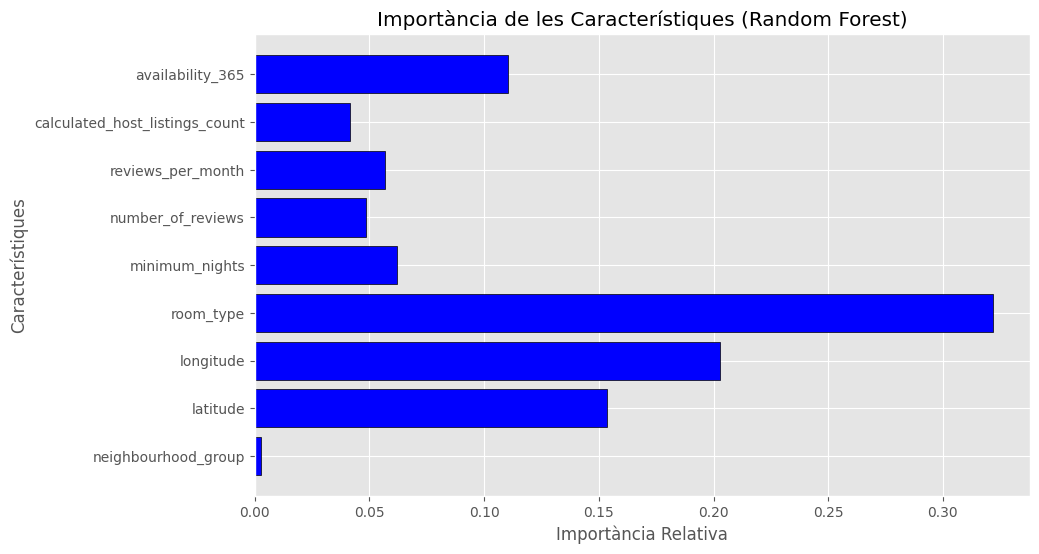

In [107]:
# Utilitzem un subconjunt del dataset més petit per accelerar encara més l'entrenament
data_sample = df.sample(frac=0.2, random_state=42)
X = data_sample.drop(columns=['price'])
y = data_sample['price']

# Divisió en conjunt d'entrenament i conjunt de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definim el model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definim els hiperparàmetres a explorar
# Definim els hiperparàmetres a explorar amb menys opcions per accelerar
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Configuració de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=5, scoring='neg_mean_squared_error', cv=2, verbose=1, n_jobs=-1, random_state=42)

# Entrenament del model utilitzant RandomizedSearchCV
random_search.fit(X_train, y_train)

# Resultats de la millor combinació d'hiperparàmetres
best_model = random_search.best_estimator_
print("Millors hiperparàmetres:", random_search.best_params_)

# Avaluació del model amb el conjunt de prova
y_pred = best_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Validació creuada per obtenir una mètrica més robusta
cv_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=2)
print("Cross-validated MSE:", -cv_scores.mean())

# Importància de les característiques
feature_importances = best_model.feature_importances_
features = X.columns

# Visualització de la importància de les característiques
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='blue', edgecolor='black')
plt.title('Importància de les Característiques (Random Forest)')
plt.xlabel('Importància Relativa')
plt.ylabel('Característiques')
plt.grid(True)
plt.show()



**Resum dels Resultats de Random Forest**

**Mètriques de Rendiment**

**Mean Squared Error (MSE):** El model té un error quadràtic mitjà de 8125.57 sobre el conjunt de test. Això indica que, de mitjana, les prediccions del preu estan a prop del valor real, tot i que encara hi ha marge per millorar.
**R² Score:** El valor de 0.377 significa que el model explica aproximadament el 37.7% de la variabilitat en els preus (price). Això és millor que el model de regressió lineal (que explicava només el 29%), però encara queda espai per a millores, especialment en termes de capturar patrons més complexos.
**Cross-validated MSE:** Amb un valor de 8600.97, la validació creuada confirma que el model té un rendiment consistent.

**Importància de les Característiques**
L'anàlisi de la importància de les característiques ens indica quines variables tenen més influència en les prediccions del preu:

- **room_type (0.3):** És la característica més important. Això té sentit perquè el tipus d'habitació (privada, compartida o l'habitatge complet) és un determinant clau en el preu.
- **longitude i latitude (0.15 cadascuna):** La ubicació geogràfica també té una gran influència, ja que la proximitat a zones cèntriques o populars afecta els preus.
- **availability_365 (0.1):** La disponibilitat anual pot correlacionar-se amb el preu, ja que els llistats amb més disponibilitat podrien tenir preus més competitius.

Característiques amb menys importància:
reviews_per_month, number_of_reviews, i calculated_host_listings_count: Tenen menor influència en el model, però encara aporten informació útil.

**Conclusions**
Millora sobre la regressió lineal: El Random Forest millora significativament les mètriques (R² i MSE) en relació amb el model de regressió lineal, gràcies a la seva capacitat de capturar relacions no lineals.

In [ ]:
# Linear Regression
#pipeline_linreg = Pipeline([
   # ('scaler', scaler),
    #('linreg', LinearRegression())
#])
#param_grid_linreg = {}

#grid_search_linreg = GridSearchCV(pipeline_linreg, param_grid_linreg, cv=5, scoring='r2', n_jobs=-1)
#grid_search_linreg.fit(X_train, y_train)

#best_params_linreg = grid_search_linreg.best_params_
#print("Linear Regression Best Hyperparameters:", best_params_linreg)

#best_linreg_model = grid_search_linreg.best_estimator_
#cv_scores_linreg = cross_val_score(best_linreg_model, X_train, y_train, cv=5, scoring='r2')
#print("Linear Regression Cross-Validation Scores:", cv_scores_linreg)
#print("Linear Regression Mean Cross-Validation Score:", cv_scores_linreg.mean())

#mae, mse, rmse = evaluate_model(best_linreg_model, X_test, y_test)
#print("Linear Regression MAE:", mae)
#print("Linear Regression MSE:", mse)
#print("Linear Regression RMSE:", rmse)


In [ ]:
# Asumimos que X_train y y_train ya están definidos y preprocesados.

# 1. Convertir la variable objetivo (y) en clases discretas
# Dividimos los valores de precio (y) en 5 categorías (bins)
#y_class = pd.cut(y_train, bins=5, labels=[0, 1, 2, 3, 4])

# 2. Definir el modelo de Regresión Logística
#log_model = LogisticRegression(max_iter=1000)

# 3. Definir los hiperparámetros para la búsqueda
#param_grid_log = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# 4. Configurar StratifiedKFold
#stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Configurar GridSearchCV con StratifiedKFold
#log_search = GridSearchCV(log_model, param_grid_log, cv=stratified_kfold, scoring='accuracy', verbose=1)

# 6. Entrenar el modelo con GridSearchCV
#log_search.fit(X_train, y_class)

# 7. Obtener los mejores hiperparámetros
#best_log_params = log_search.best_params_
#print("Mejores hiperparámetros para Regresión Logística:", best_log_params)

# 8. Evaluar con validación cruzada
#best_log_model = LogisticRegression(**best_log_params, max_iter=1000)
#cv_scores_log = cross_val_score(best_log_model, X_train, y_class, cv=stratified_kfold, scoring='accuracy')
#cv_mean_log = cv_scores_log.mean()

#print("Puntuaciones de validación cruzada:", cv_scores_log)
#print("Puntuación media de validación cruzada:", cv_mean_log)